# Topics
1. Supervised Learning
    - Regression problem
    - Classification problem
2. Unsupervised Learning
3. Customer Segmentation
    - The Problem
    - Raw Data
    - Final Data
    - Chanllenges
    - Final Output
4. Collaborative Filtering

In [145]:
from __future__ import print_function, division, absolute_import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn import datasets

from IPython.display import Image



%matplotlib inline

In [148]:
pd.set_option('display.max_row',None)

In [149]:
def get_data(data, x_feature, y_feature):
    return data[x_feature].as_matrix(), data[y_feature].as_matrix()

**Problem 1**. You are planning to buy a house and you need to figure out the appropriate price for it. How will you do it? 

*Steps* 
    - Collect data about various aspect of house and their price
    - Build a model which can explain the relation between various aspect of house and it's price
    - Train this model, test it and then predict the price 
- In example below we try to accomplish this, while understanding various aspect of ML

In [150]:
# Reading data
housing_data = pd.read_csv('data/house_data.csv.gz', index_col = None)

# Lets have a look at the detail of the data
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 17 columns):
id               21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(3), int64(14)
memory usage: 3.0 MB


In [151]:
# lets have a look at the data
housing_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,1,221900,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,1340,5650
1,2,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,1690,7639
2,3,180000,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,2720,8062
3,4,604000,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,1360,5000
4,5,510000,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,1800,7503


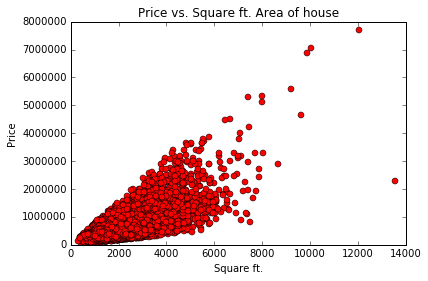

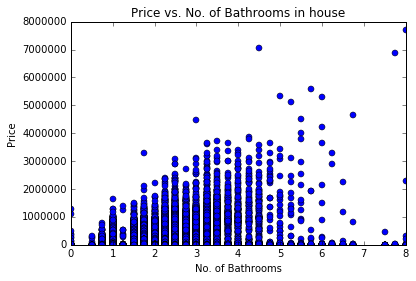

In [152]:
# Let's check grahically if there is relationship between price and sqft_living
plt.figure(1)
plt.subplot(111)
plt.plot(housing_data.sqft_living, housing_data.price, 'ro')
plt.xlabel('Square ft.')
plt.ylabel('Price')
plt.title("Price vs. Square ft. Area of house")

plt.figure(2)
plt.subplot(111)
plt.plot(housing_data.bathrooms, housing_data, 'bo')
plt.xlabel("No. of Bathrooms")
plt.ylabel("Price")
plt.title("Price vs. No. of Bathrooms in house")
plt.show()

- From above graph we can assess that there is a some linearly increasing relationship between price and sqft_living, price and number of bathrooms

- Lets create two linear model to predict price using above data

- First Model:  
$$price = \alpha_0 + \alpha_1*{Sqft\hspace{1mm} Living}$$ 

or, $$y = mx + c$$

- Second Model: 

$$price = \alpha_0 + \alpha_1*Sqft Living + \alpha_2*No. of\hspace{1mm} Bathrooms$$ 
or, $$y = ax_1 + bx_2 + c$$

In [153]:
# lets randomly select 80% data to create two models and call this data as training data
train_data, test_data = train_test_split(housing_data, test_size=0.2)


In [154]:
## Preparing test and train data for First Model

x_first_train, y_first_train = get_data(train_data, ['sqft_living'], ['price'])
x_first_test, y_first_test = get_data(test_data, ['sqft_living'], ['price'])


In [155]:
## Creating first model i.e. getting the value of 'a0' and 'a1'

lm_first = LinearRegression(fit_intercept=True)
lm_first.fit(x_first_train, y_first_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [156]:
## Preparing the train and test data for second model 

x_second_train, y_second_train = get_data(train_data, ['sqft_living', 'bathrooms'], ['price'])
x_second_test, y_second_test = get_data(test_data, ['sqft_living', 'bathrooms'], ['price'])


In [157]:
## Creating second model i.e. getting the value of  'a0', 'a1' and 'a2'
lm_second = LinearRegression(fit_intercept=True)
lm_second.fit(x_second_train, y_second_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

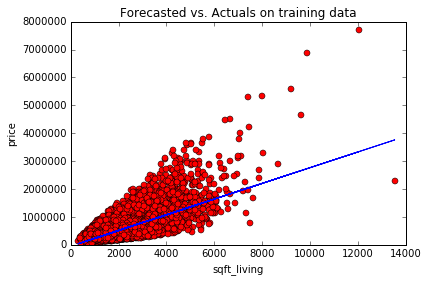

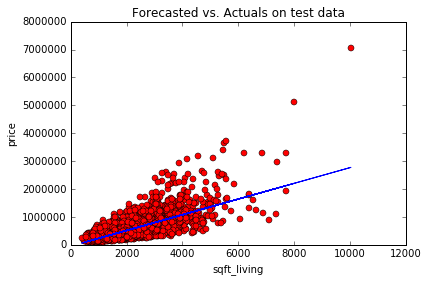

In [158]:
plt.figure(1)
plt.subplot(111)
plt.plot(x_first_train, y_first_train, 'ro',
        x_first_train, lm_first.predict(x_first_train), 'b-')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title("Forecasted vs. Actuals on training data")


plt.figure(2)
plt.subplot(111)
plt.plot(x_first_test, y_first_test, 'ro',
         x_first_test, lm_first.predict(x_first_test), 'b-')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title("Forecasted vs. Actuals on test data")

In [159]:
## Create 3-D plot for second model

#### Lets check the parameters of the two models

In [160]:
print("Intercept and co-efficients of the first model", lm_first.intercept_[0],"   " ,lm_first.coef_[0][0])
print("Intercept and co-efficients of the second model", lm_second.intercept_[0],"   ", lm_second.coef_[0][0], 
      lm_second.coef_[0][1])

Intercept and co-efficients of the first model -44679.8794861     281.195235034
Intercept and co-efficients of the second model -42934.3595912     282.580128157 -2185.62260643


In [161]:
## Lets compare the result of two models
print("Prediction for first Model", lm_first.predict(1000)[0][0])
print("Prediction for second Model, with one bathroom", lm_second.predict(np.reshape([1000,1], (1,2)))[0][0])
print("Prediction for second Model, with two bathroom", lm_second.predict(np.reshape([1000,2], (1,2)))[0][0])

Prediction for first Model 236515.355548
Prediction for second Model, with one bathroom 237460.145959
Prediction for second Model, with two bathroom 235274.523353


- In second model, we observe that for same size of house the price of house will reduce by -5512 for unit increase in number of bathroom, this is bit counter intutive because for bigger house if it has more bathroom it might be better to a certain extent

- Two models predict two different prices => Implies that with more data prediction of model changes, Machine Learning - Is it getting better or worse ?


In [162]:
## Create 3-D and 2-D plot for the two model

- We are not sure which model is better and need further analysis for this
- To assess the quality we check which model forecasts better on test data
- Test data is used because model has not seen this data
- Root Mean Square Error (RMSE) which compares how much predicted value deviate from actuls, can be used to assess the quality of model 

$$RMSE = \sum\limits_{i=1}^{i=N}(y_{actual} - y_{predicted})^2$$

*Ancedote - If teacher gives the same questions in exam as discussed in class then won't everyone perform well and this will not help in differentiating good students from not so good students*

In [163]:
## Analysis of two models, calculating root mean square error for both model on compete data set
error_first  =  y_first_test - lm_first.predict(x_first_test)
error_second =  y_second_test - lm_second.predict(x_second_test)

rms_first = np.sqrt(np.dot(error_first.T, error_first))
rms_second = np.sqrt(np.dot(error_second.T, error_second))

In [164]:
print("Root Mean Square Error for half and full model are::", rms_first[0][0],"  ", rms_second[0][0],"  ", 
      rms_first[0][0] - rms_second[0][0])

Root Mean Square Error for half and full model are:: 17474525.8463    17472317.9978    2207.84853059


**Conclusion:**
- Second model has less error when compared to the first model, though difference is not very high
- It might be better to use second model for predicting the price of the house
- But is it the best possible model ? 
    - No, second model is bit counter-intutive
- Self Read: How can we get better model ? 
    - Hint: Normalize data, try using more information from data - feature

**Supervised Learning**
- We are using labeled data for training and testing i.e. data has target variable or y variable
- Target variable is used to assess the quality of the model

**Within Supervised Domain this type of problem is refered as Regression Problem - **
- Output variable takes continuous value
- Examples 
    - Predicting sales, 
    - Predicting rainfall,
    - Predicting GDP growth (time series regression) etc.
- **Note:: A variant of this model is being used in Scoring Engine of Retail.Me**


*Self Read:* 
- Objective function which is optimized to obtain the parameter of the model compares forecasted value with actual target value



**==========================================================================================**



**Problem 2. You are a manufaturer and have launched a new product in the market. Now, you want to assess if customers are taking that product positively or negatively. **


Steps:
- Collect customer review, mostly from online formus
- Ask multiple lingustics to assess whether a given review is postivie or negative
- Now use above tagged data to build a model which can predict whether the new review is positive or negative

Let's look at an example on how we can do this

In [165]:
# Loading data for sentiment analysis
review_data = pd.read_csv('data/data_for_sentiment.csv.gz', index_col=None)

In [166]:
#lets check what all we have in data
review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166752 entries, 0 to 166751
Data columns (total 3 columns):
name         166752 non-null object
review       165975 non-null object
sentiment    166752 non-null int64
dtypes: int64(1), object(2)
memory usage: 5.1+ MB


In [167]:
review_data.head()

,name,review,sentiment
0,product_20754,I only purchased a second-year calendar for my...,-1
1,product_26728,This bear is absolutely adorable and I would g...,-1
2,product_26727,This book is boring. Nothing to stimulate my g...,-1
3,product_14147,The reason:Small sizeHard to apply on the wall...,-1
4,product_31033,Would not purchase again or recommend. The dec...,-1


#### above implies that some of the reviews are null and we need to remove them

In [168]:
#view empty/null entries
review_data = review_data[review_data.review.notnull()]

In [169]:
#removing empty/ null review reviews
review_data = review_data[review_data.review.notnull()]

In [170]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165975 entries, 0 to 166751
Data columns (total 3 columns):
name         165975 non-null object
review       165975 non-null object
sentiment    165975 non-null int64
dtypes: int64(1), object(2)
memory usage: 5.1+ MB


In [171]:
def count_awesome_aweful(text):
    count_awesome = 0
    count_aweful = 0
    text = remove_punctuation(text)
    
    for t in text.split():
        if t.lower() == "awesome":
            count_awesome +=1
        elif t.lower() == "aweful":
            count_aweful +=1
    return count_awesome, count_aweful

def remove_punctuation(text):
    import string
    return text.translate(None, string.punctuation) 


Once you have tagged data, you call your team to use this to build a sentiment analysis model. 
One of the team member suggestes a very basic model which is based on counting the number of awesome and aweful in the review i.e. build model using the rule given below


$$sentiment = positive,\hspace{10mm} if\hspace{2mm} No.\hspace{2mm} of\hspace{2mm} Awesome\hspace{2mm} > No.\hspace{2mm} of\hspace{2mm} Aweful$$


$$sentiment = neutral,\hspace{10mm} if\hspace{2mm} No.\hspace{2mm} of\hspace{2mm} Awesome\hspace{2mm} = No.\hspace{2mm} of\hspace{2mm} Aweful$$



$$sentiment = negative,\hspace{7mm} if\hspace{2mm} No.\hspace{2mm} of\hspace{2mm} Awesome\hspace{2mm} < No.\hspace{2mm} of\hspace{2mm} Aweful$$

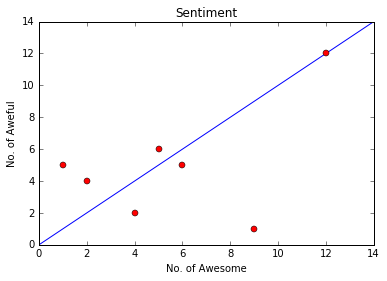

In [172]:
## Graphically model is -
plt.plot(range(15), range(15), 'b-', [1, 2 , 4, 9, 12, 5, 6], [5, 4, 2, 1, 12, 6, 5], 'ro')
plt.xlabel('No. of Awesome')
plt.ylabel('No. of Aweful')
plt.title('Sentiment')
plt.show()

In [173]:
## Counting number of awesome and aweful in each review
review_data['awesome_count'],review_data['aweful_count'] = zip(*review_data['review'].apply(count_awesome_aweful))

In [174]:
## Getting predicted sentiment
review_data['predicted_sentiment'] = 0
review_data.ix[review_data.awesome_count < review_data.aweful_count, 'predicted_sentiment'] = -1
review_data.ix[review_data.awesome_count > review_data.aweful_count, 'predicted_sentiment'] = 1

In [175]:
review_data.head()

,name,review,sentiment,awesome_count,aweful_count,predicted_sentiment
0,product_20754,I only purchased a second-year calendar for my...,-1,0,0,0
1,product_26728,This bear is absolutely adorable and I would g...,-1,0,0,0
2,product_26727,This book is boring. Nothing to stimulate my g...,-1,0,0,0
3,product_14147,The reason:Small sizeHard to apply on the wall...,-1,0,0,0
4,product_31033,Would not purchase again or recommend. The dec...,-1,0,0,0


Assessing the quality of model

In [176]:
# let's find how many are labelled positive and how many we have predicted as positive
print("Positive Classification accuracy",
      len(review_data[(review_data.predicted_sentiment ==1) & (review_data.sentiment ==1)]) / 
      len(review_data[review_data.sentiment == 1]))

# let's find how many are labelled negative and how many we have predicted as negative
print("Negative Classification accuracy",
      len(review_data[(review_data.predicted_sentiment == -1) & (review_data.sentiment == -1)]) / 
      len(review_data[review_data.sentiment == -1]))

Positive Classification accuracy 0.0240718717313
Negative Classification accuracy 0.000454666009927


In [177]:
## Calculating accuracy of this model
print("Overall Accuracy", 
      (len(review_data[(review_data.predicted_sentiment ==1) & (review_data.sentiment ==1)])  + 
      len(review_data[(review_data.predicted_sentiment == -1) & (review_data.sentiment == -1)])+
      len(review_data[(review_data.predicted_sentiment == 0) & (review_data.sentiment == 0)]))/ 
      len(review_data))

Overall Accuracy 0.0203163126977


Lets see how well a model which just predicts everything as positive performs

In [178]:
## Calculating accuracy when we predict all as positive sentiment
print("Accuracy of all positive model", 
      len(review_data[review_data.sentiment == 1])/len(review_data))

Accuracy of all positive model 0.840982075614


## Conclusion
- A simple model of tagging everything as positive performs better than our navie model. 


- We need to come up with model which uses more features i.e. more words from the text -- Not covered, please try yourself. 


- Some hint 
    - Would using all word make sense ? 
    - What about stop words like 'a', 'an', 'the' etc. ?
    - Would it better to talk in terms of probability rather than absolutely saying positive or negative (Refer the chart above)
        - if score is high positive, we can be more confident of it being psotive and vice versa


- A good model should have overall accuracy more than 84% in this case. 


- However, this might not gaurentee best model as accuracy measure might not the best measure for classification problem


    - Example: let's assume that cancer occurs to 1 out of 100 people, then if we predict no one has cancer then we are 99% accurate but this will also mean that a mis-diagonised person will loose his life. 
    - In such cases we use precision and re-call. Read about it!!

**This type of problem is refered as Classification Problem in Supervised Learning Domain**
- Output variable takes class label
### Example:: 
    - Classifying if patient is diabetic or not 
    - Classify if given image is that of dog or cat
    - Classify images of digit into 0, 1, 2 etc.

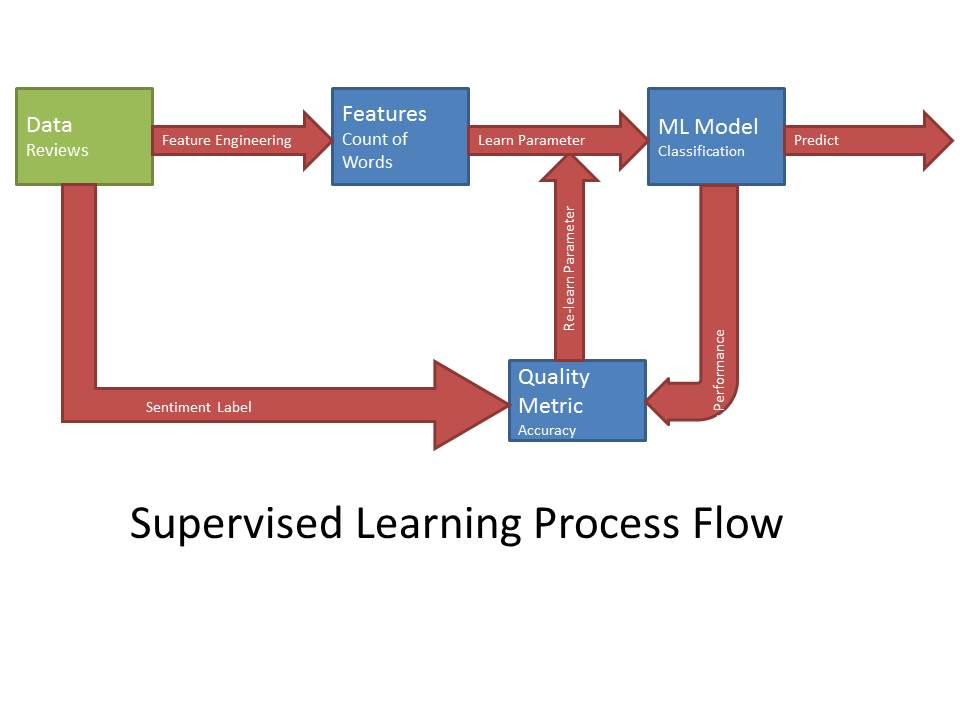

In [179]:
Image(filename='data/supervised learning.jpg')

** Supervised Learning Challenges:**
- Selecting best possible feature
- Choosing best possible algorithm which scales well and performs on varied set of result

================================================================================================================================

**Problem 3. You are retailer and have transactions made by customers. Now, you want to find what set of customer buy what type of items i.e. find pattern in un-labled set of data**

In [180]:
## lets create some test data which has some strcutre in it
np.random.seed(10)
x1 = np.random.normal(2, 1, 100)
y1 = x1 + np.random.normal(0,1,len(x1))
x2 = np.random.normal(10,1,100)
y2 = x2 + np.random.normal(0,1,len(x2))

x = np.concatenate((x1,x2), axis=0)
y = np.concatenate((y1,y2), axis=0)

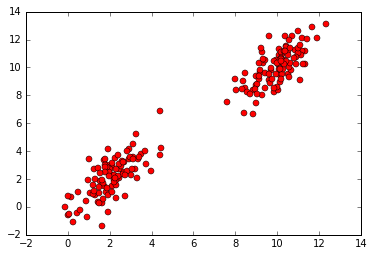

In [181]:
plt.plot(x,y, 'ro')

- We can clearly see there are two groups/cluster in above data 
- Our aim would be to separate and assign data points to one of these clusters
- One method would be-
    - Randomly select two data points and call them the center of two clusters
    - Calculate distance of all points to these points 
    - Assign data to the cluster to which it has closest
    - Once done recalculate the centers, and repeat for fixed number of iterations
    - This method of finding similar data points is called k-means 

In [182]:
# lets use k-means to find the 2 cluster
kmeans_simple = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300,  random_state=10)
kmeans_simple.fit(np.column_stack((x,y)))

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=10, tol=0.0001,
    verbose=0)

In [198]:
## Centers of the clusters
kmeans_simple.cluster_centers_

array([[  2.07941666,   2.14861385],
       [  9.97609444,  10.05568537]])

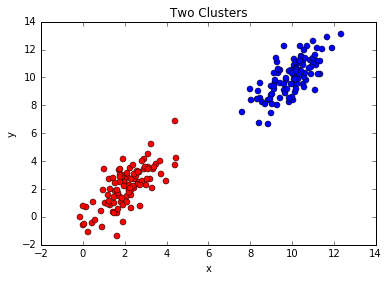

In [184]:
# lets see how good work has been done by k-means in grouping the points
clustered_data =np.column_stack((x,y,kmeans_simple.labels_))
first_cluster = clustered_data[kmeans_simple.labels_==0]
second_cluster = clustered_data[kmeans_simple.labels_==1]

plt.plot(first_cluster[:,0], first_cluster[:,1], 'ro',
        second_cluster[:,0], second_cluster[:,1], 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Two Clusters')

- Above data was very simple 2-dimensional data which we can visually assess and conclude that 2 clusters are all we need to create groups
- Lets look at more complex 2-dimensional data and see if we can visually determine the number of clusters

In [185]:
## Now lets try to find grouping in a complex 2-dimensional data
x_complex = np.concatenate((np.random.normal(1,1,200),
                           np.random.normal(2,1,200),
                           np.random.normal(3,1,200)), axis=0)
y_complex = x_complex + np.random.normal(0,5,len(x_complex))

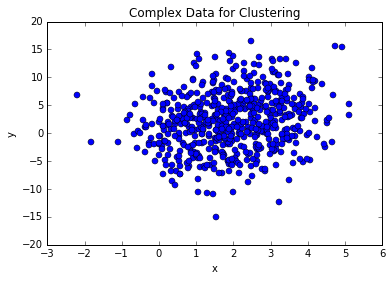

In [186]:
plt.plot(x_complex, y_complex, 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Complex Data for Clustering")

- How many clusters ?
- Lets try to create 2, 3 and 4 clusters on this data and check if we can assess the quality visually

In [187]:
## 2 cluster
# lets use k-means to find the cluster
kmeans_2 = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300,  random_state=10)
kmeans_2.fit(np.column_stack((x_complex,y_complex)))

clustered_data_2 =np.column_stack((x_complex,y_complex,kmeans_2.labels_))
first_cluster_2 = clustered_data_2[kmeans_2.labels_==0]
second_cluster_2 = clustered_data_2[kmeans_2.labels_==1]

## 3 cluster
# lets use k-means to find the cluster
kmeans_3 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300,  random_state=10)
kmeans_3.fit(np.column_stack((x_complex,y_complex)))

clustered_data_3 =np.column_stack((x_complex,y_complex,kmeans_3.labels_))
first_cluster_3 = clustered_data_3[kmeans_3.labels_==0]
second_cluster_3 = clustered_data_3[kmeans_3.labels_==1]
third_cluster_3 = clustered_data_3[kmeans_3.labels_==2]

## 4 cluster
# lets use k-means to find the cluster
kmeans_4 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300,  random_state=10)
kmeans_4.fit(np.column_stack((x_complex,y_complex)))

clustered_data_4 =np.column_stack((x_complex,y_complex,kmeans_4.labels_))
first_cluster_4 = clustered_data_4[kmeans_4.labels_==0]
second_cluster_4 = clustered_data_4[kmeans_4.labels_==1]
third_cluster_4 = clustered_data_4[kmeans_4.labels_==2]
fourth_cluster_4 = clustered_data_4[kmeans_4.labels_==3]


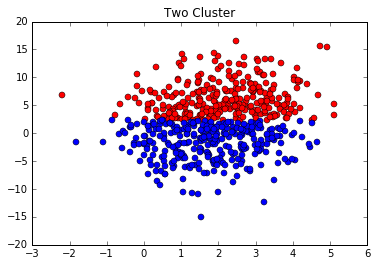

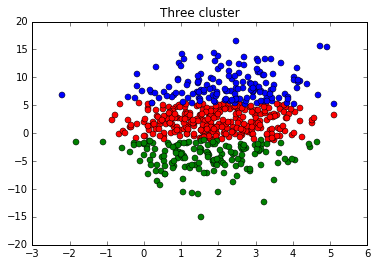

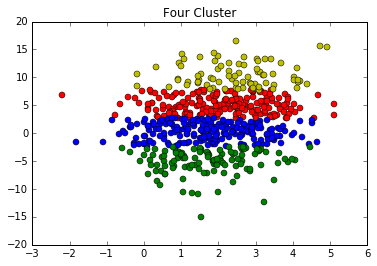

In [188]:
plt.figure(1)
plt.subplot(111)
plt.plot(first_cluster_2[:,0], first_cluster_2[:,1], 'ro',
        second_cluster_2[:,0], second_cluster_2[:,1], 'bo')
plt.title("Two Cluster")

plt.figure(2)
plt.subplot(111)
plt.plot(first_cluster_3[:,0], first_cluster_3[:,1], 'ro',
        second_cluster_3[:,0], second_cluster_3[:,1], 'bo',
        third_cluster_3[:,0], third_cluster_3[:,1], 'go')
plt.title("Three cluster")

plt.figure(3)
plt.subplot(111)
plt.plot(first_cluster_4[:,0], first_cluster_4[:,1], 'ro',
        second_cluster_4[:,0], second_cluster_4[:,1], 'bo',
        third_cluster_4[:,0], third_cluster_4[:,1], 'go',
        fourth_cluster_4[:,0], fourth_cluster_4[:,1], 'yo')
plt.title("Four Cluster")
plt.show()

- What is the optimal number of clusters
    - Not easy to assess visually
    - We will have to use some mathematical measure to assess it, after next example

** Now, lets look at data which has four dimension **

In [189]:
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
iris_data = pd.DataFrame(X_iris)
iris_data = iris_data.rename(columns={0:'Sepal Length', 1: 'Sepal Width', 2:'Petal Length', 3:'Petal Width'})

In [190]:
iris_data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


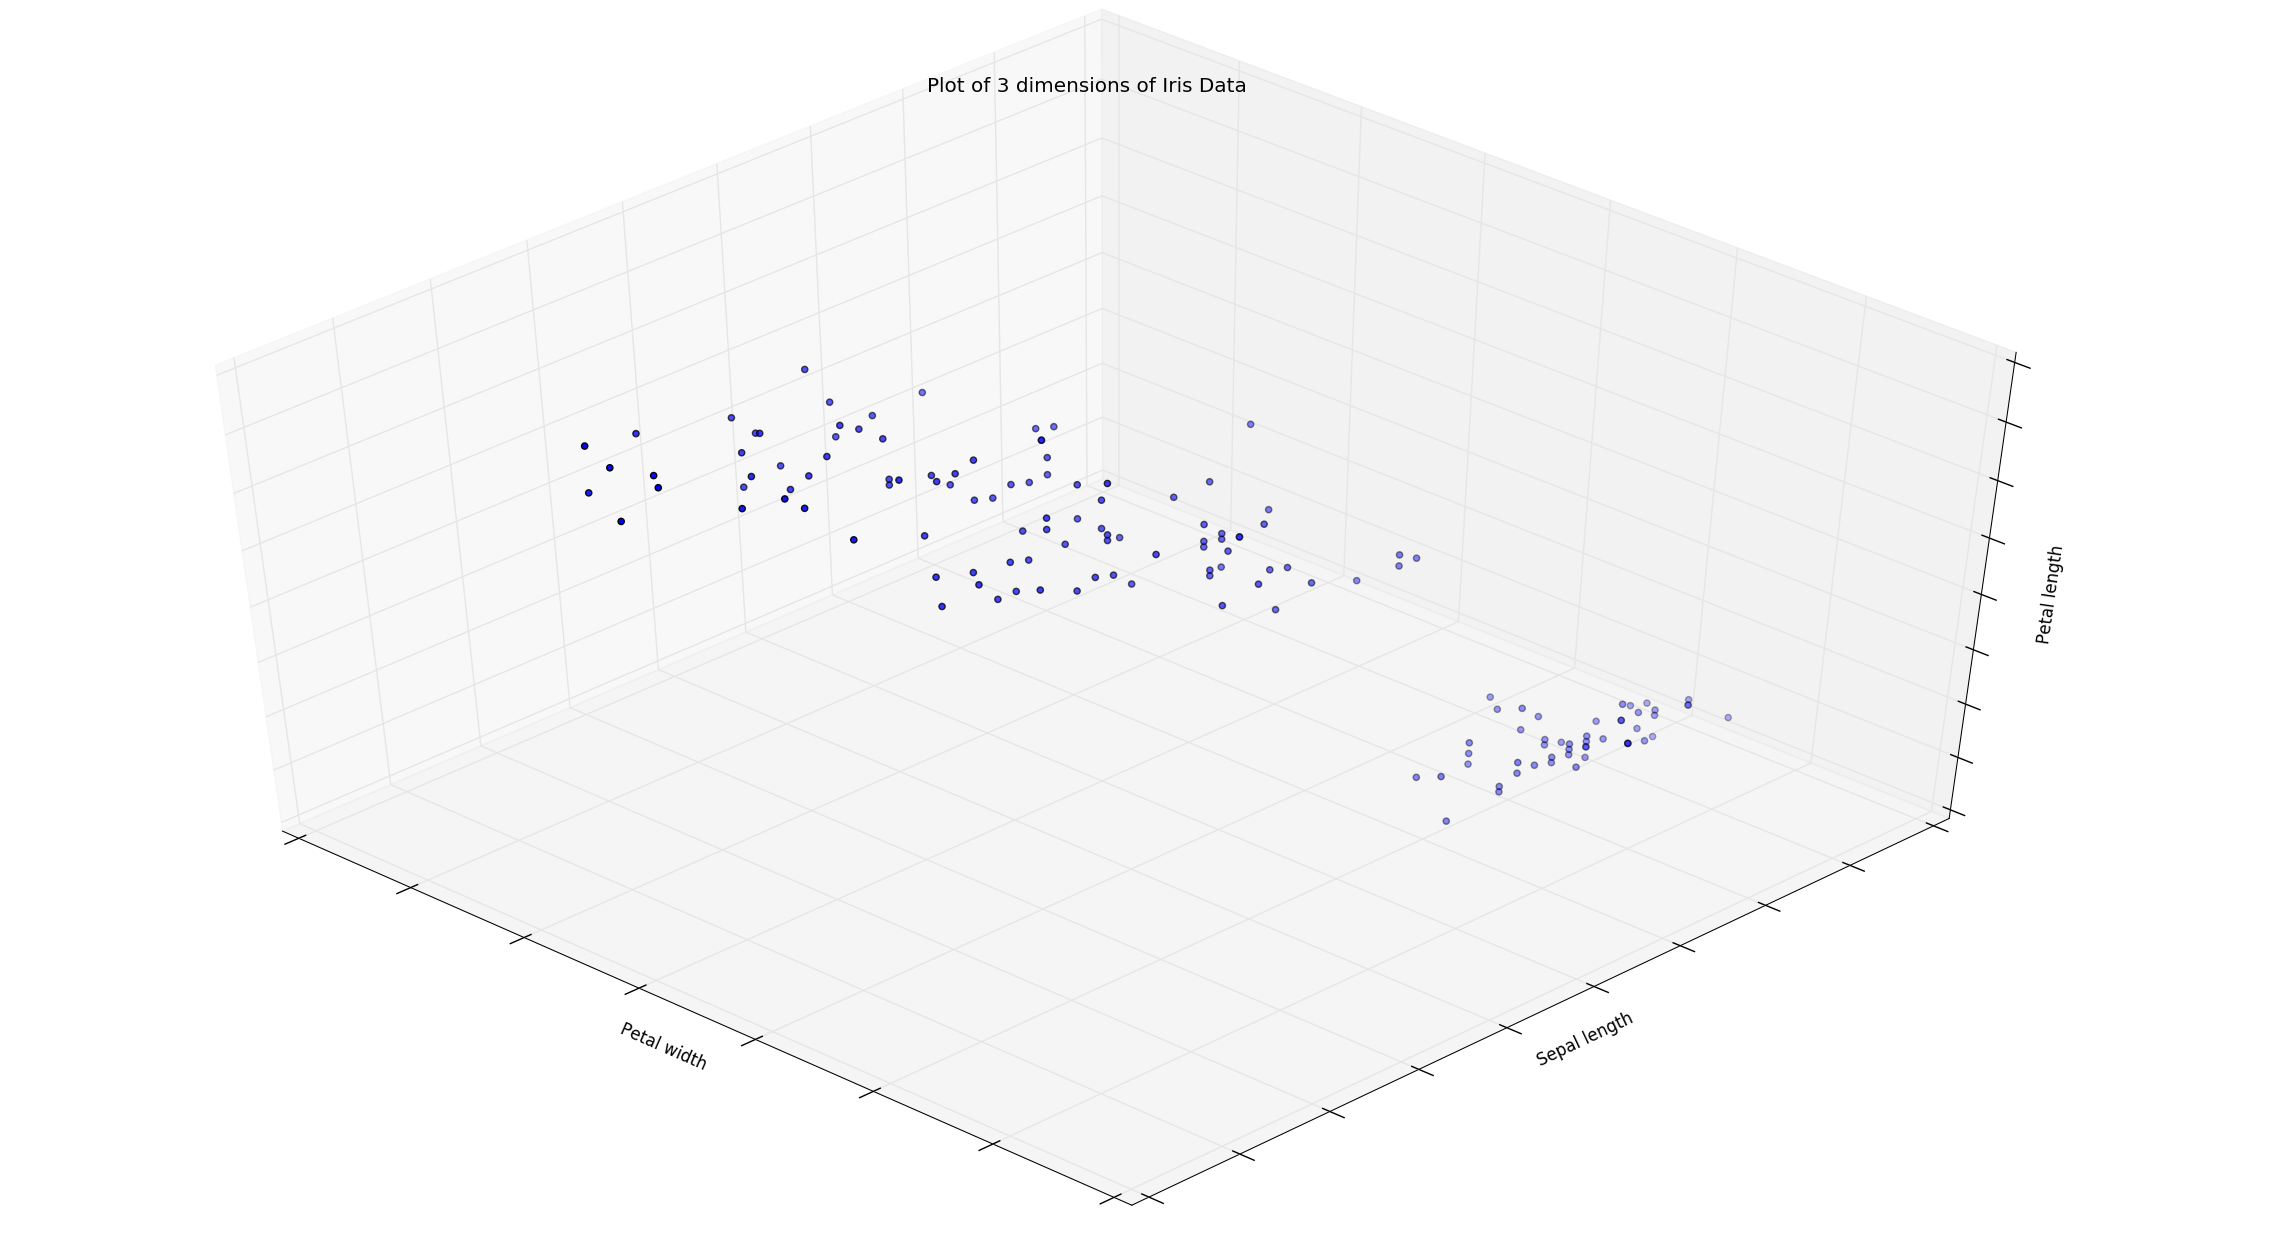

In [207]:
Image('data/Iris Figure1.png')

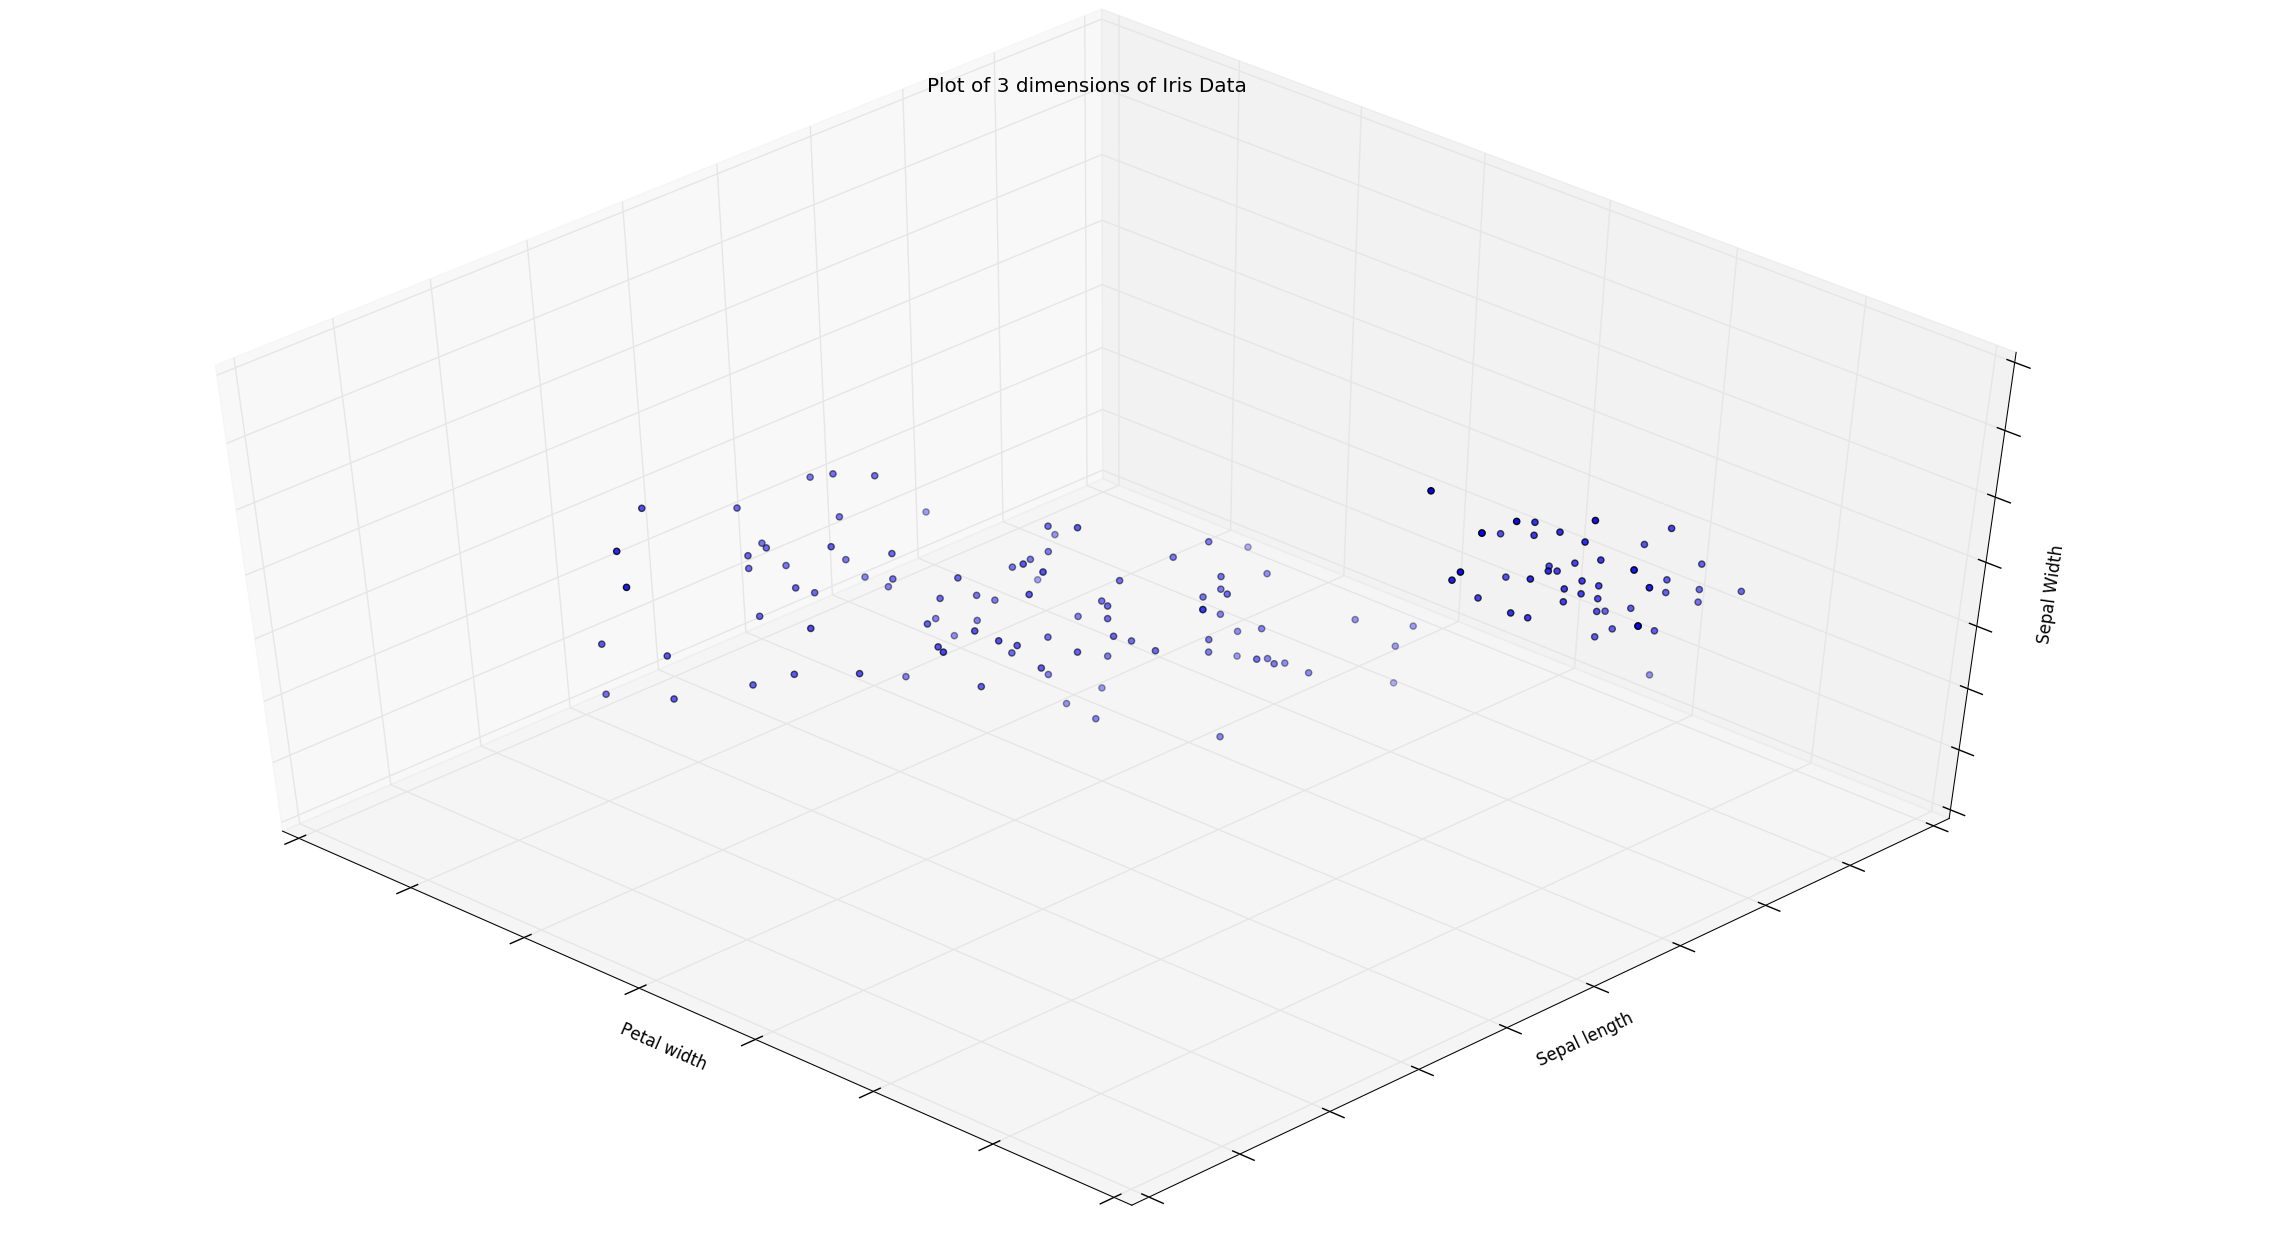

In [208]:
Image('data/Iris Figure 2.png')

- In two plots above we represents different set of features from data
- We can clearly see that different set of features are suggesting different number of clusters
    - Optimal number of clusters depends upon the feature which we use

Let's create 3, 4 and 5 clusters using features Petal Width, Petal length and Sepal Length and analyse them visually

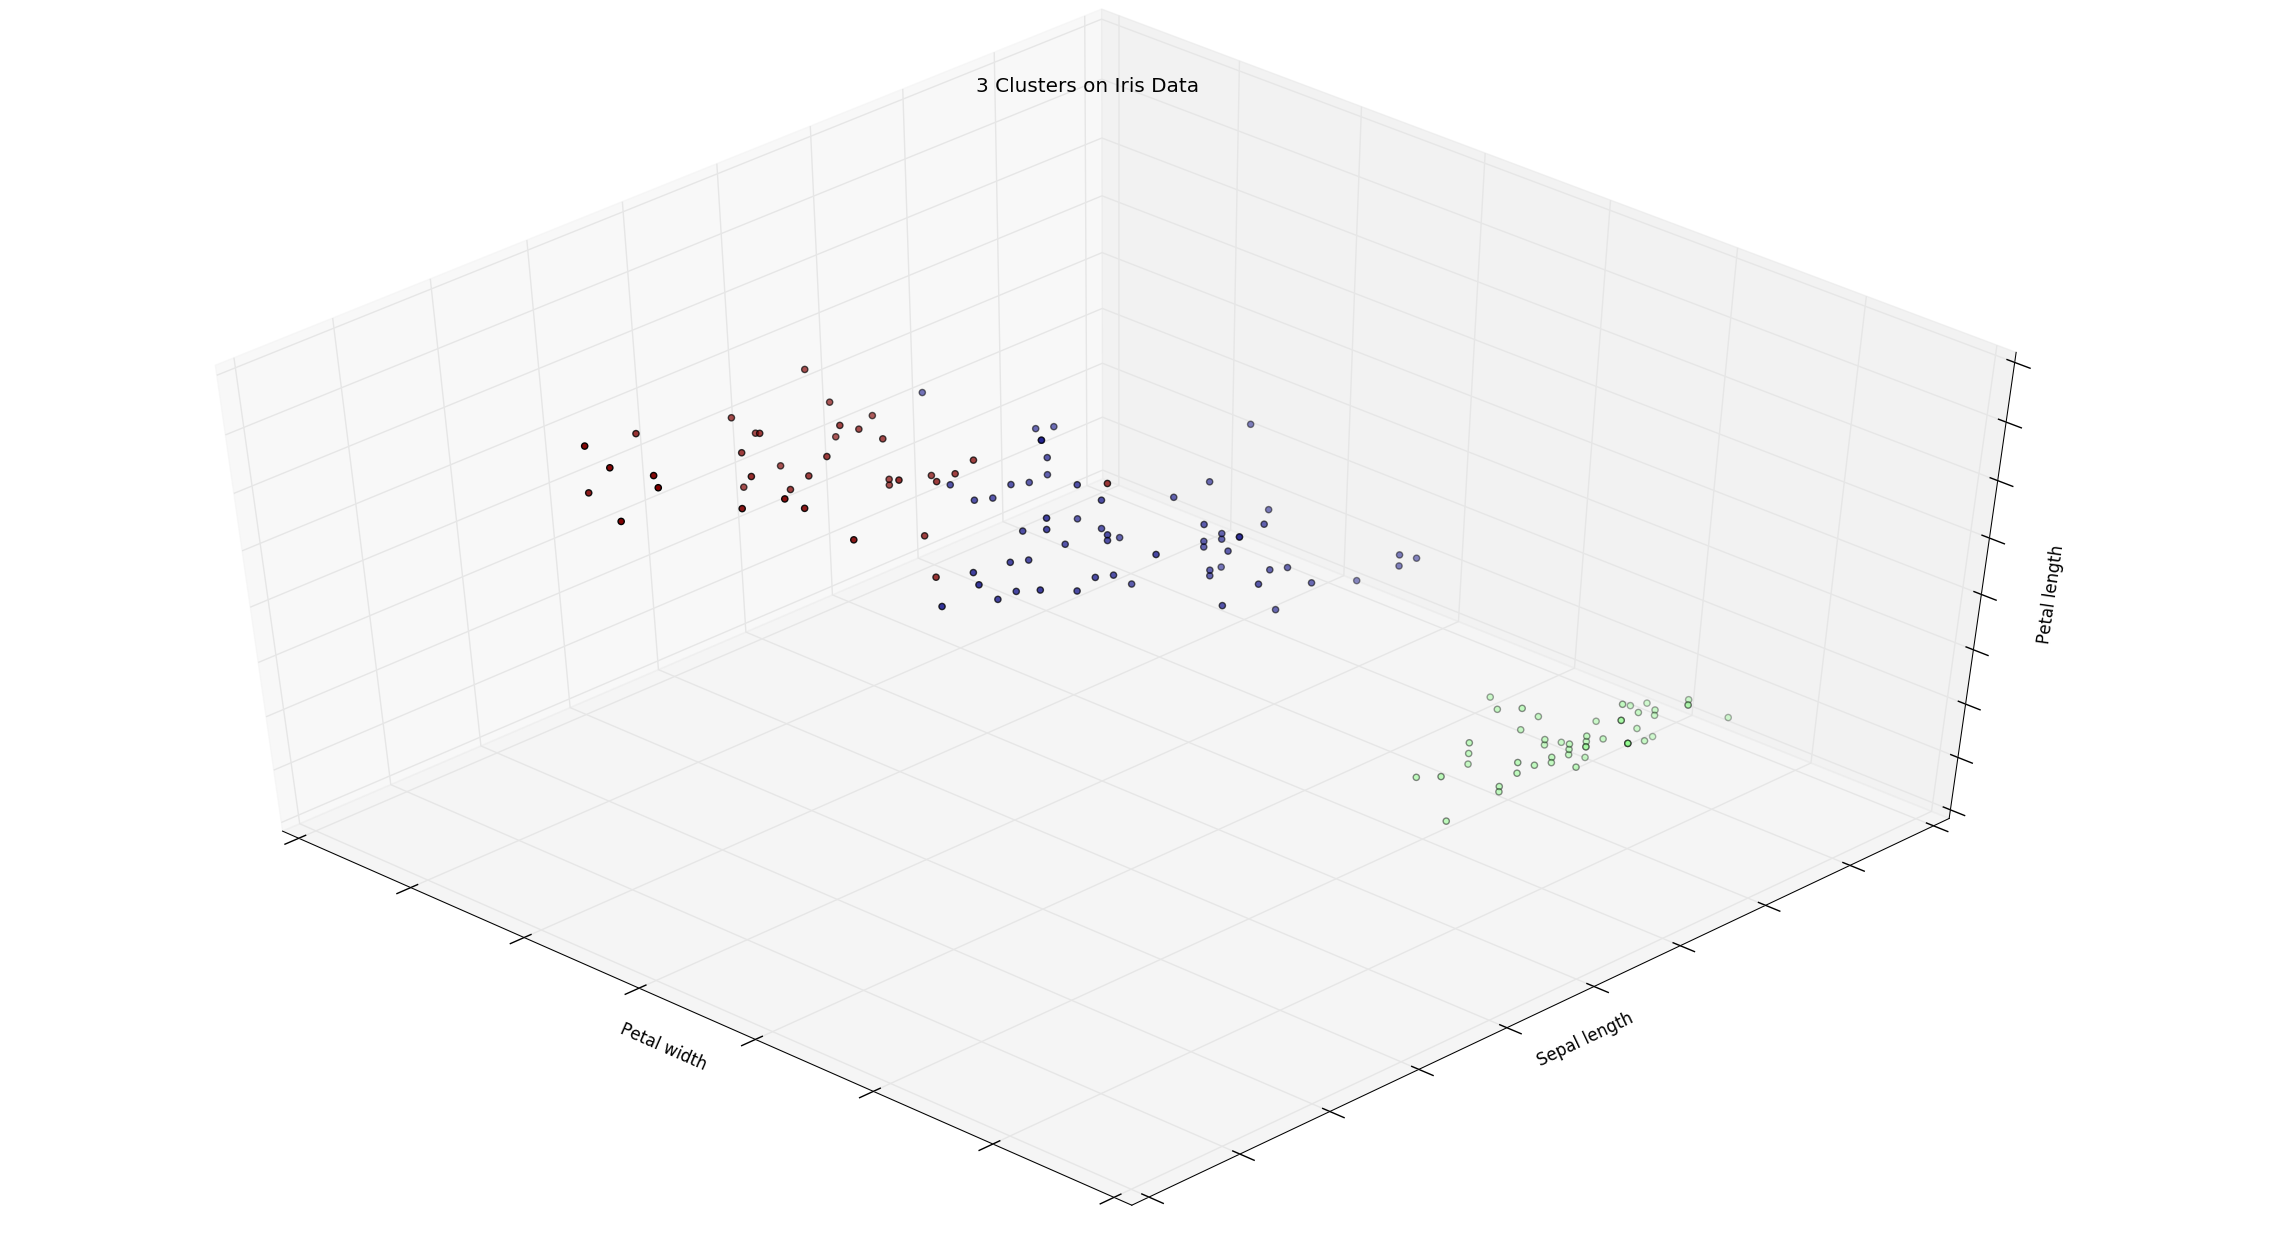

In [210]:
Image('data/Iris 3 Clusters.png')

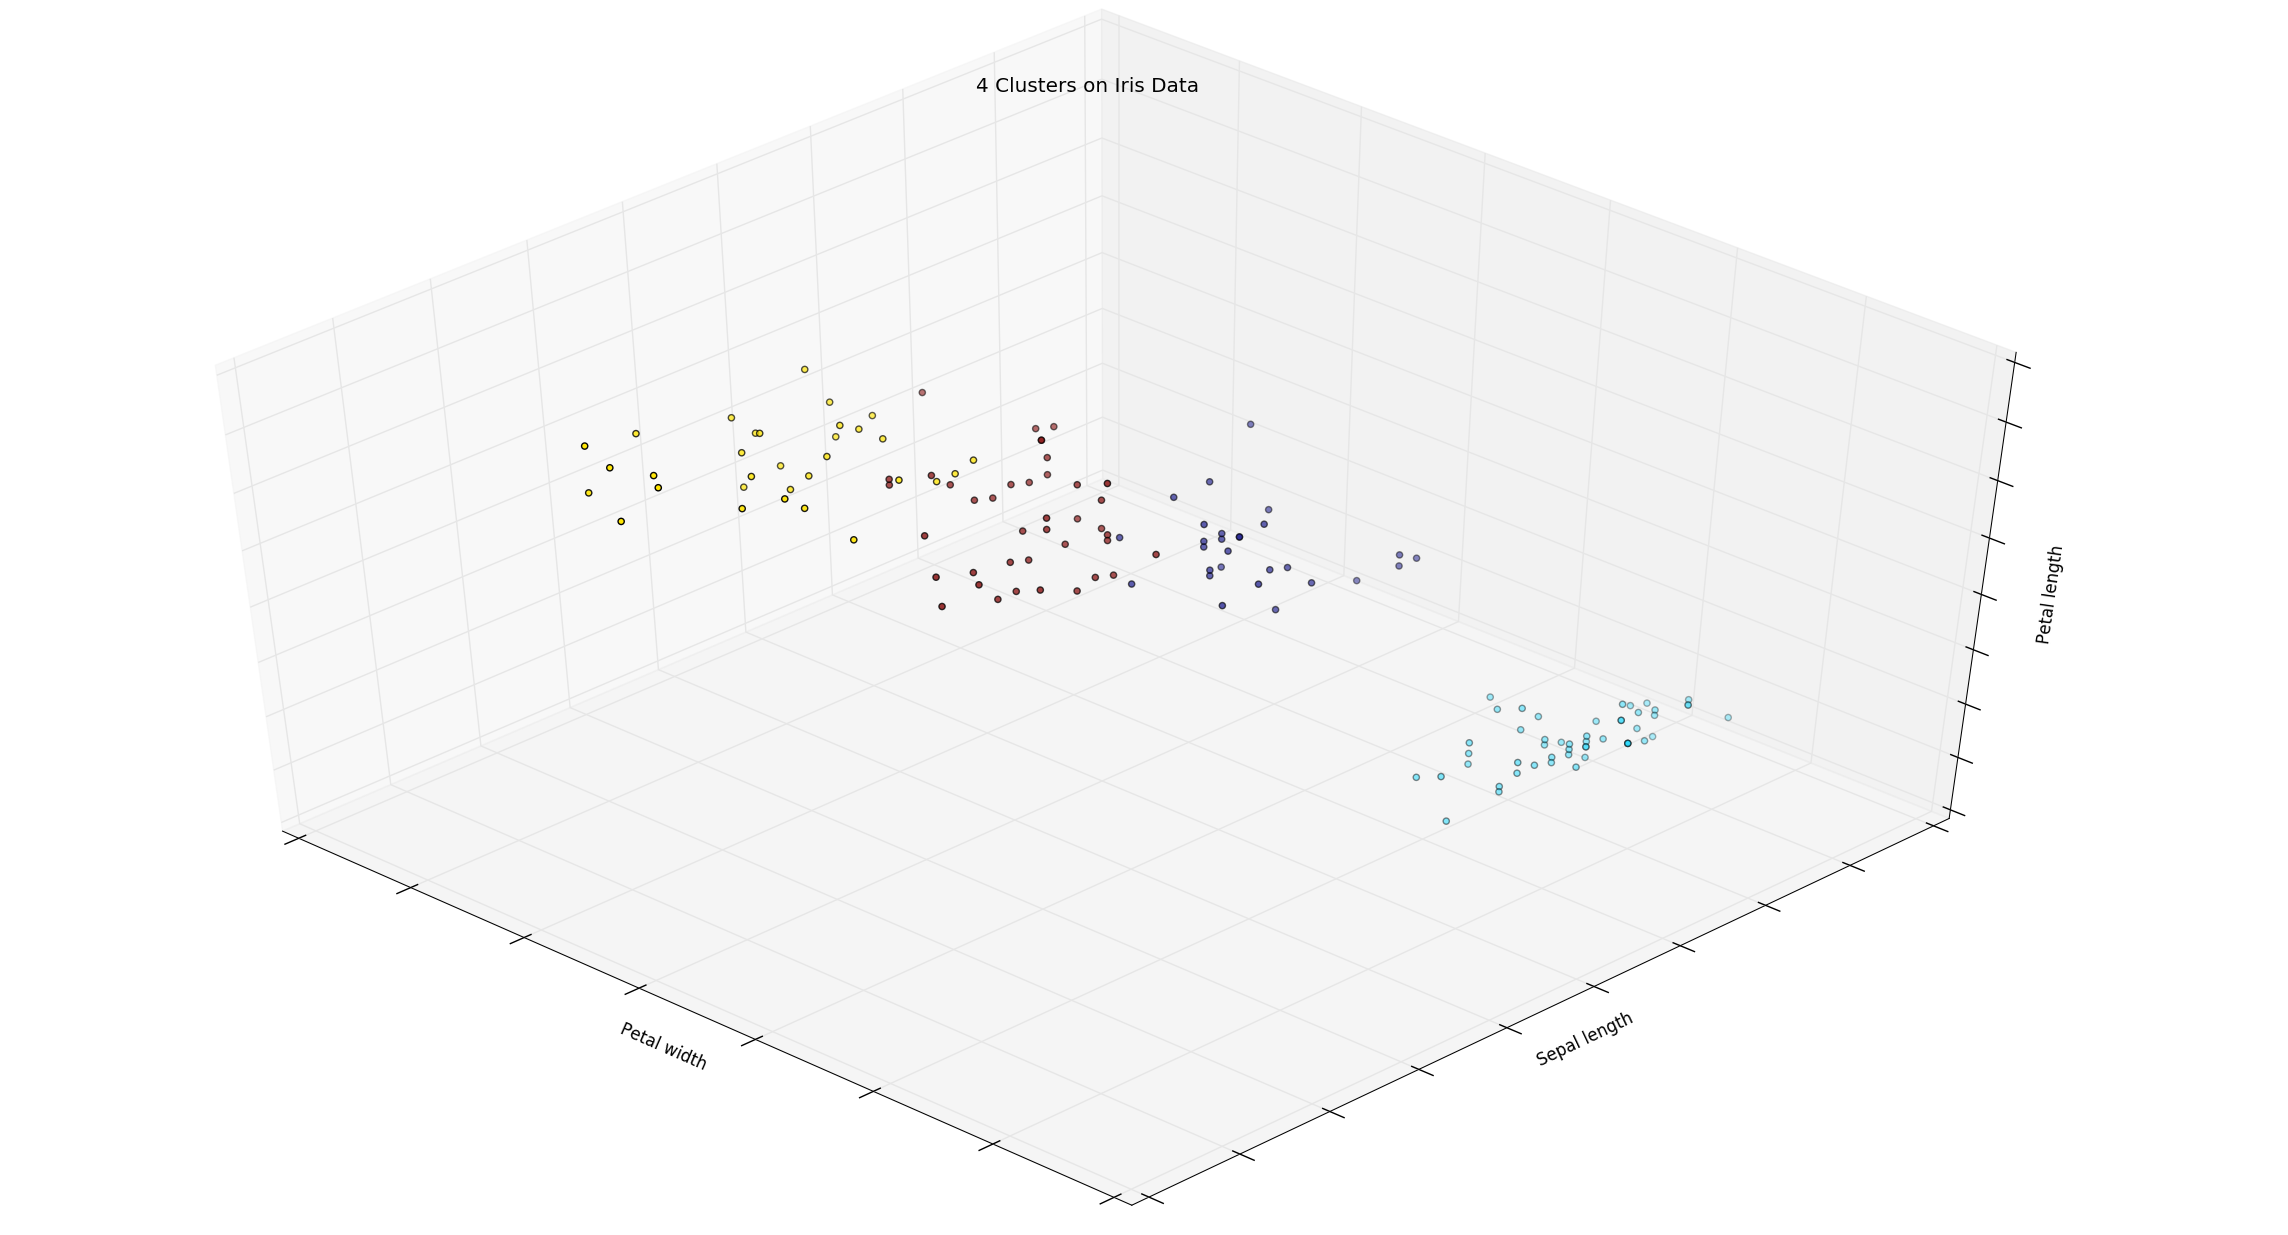

In [211]:
Image('data/Iris 4 Clusters.png')

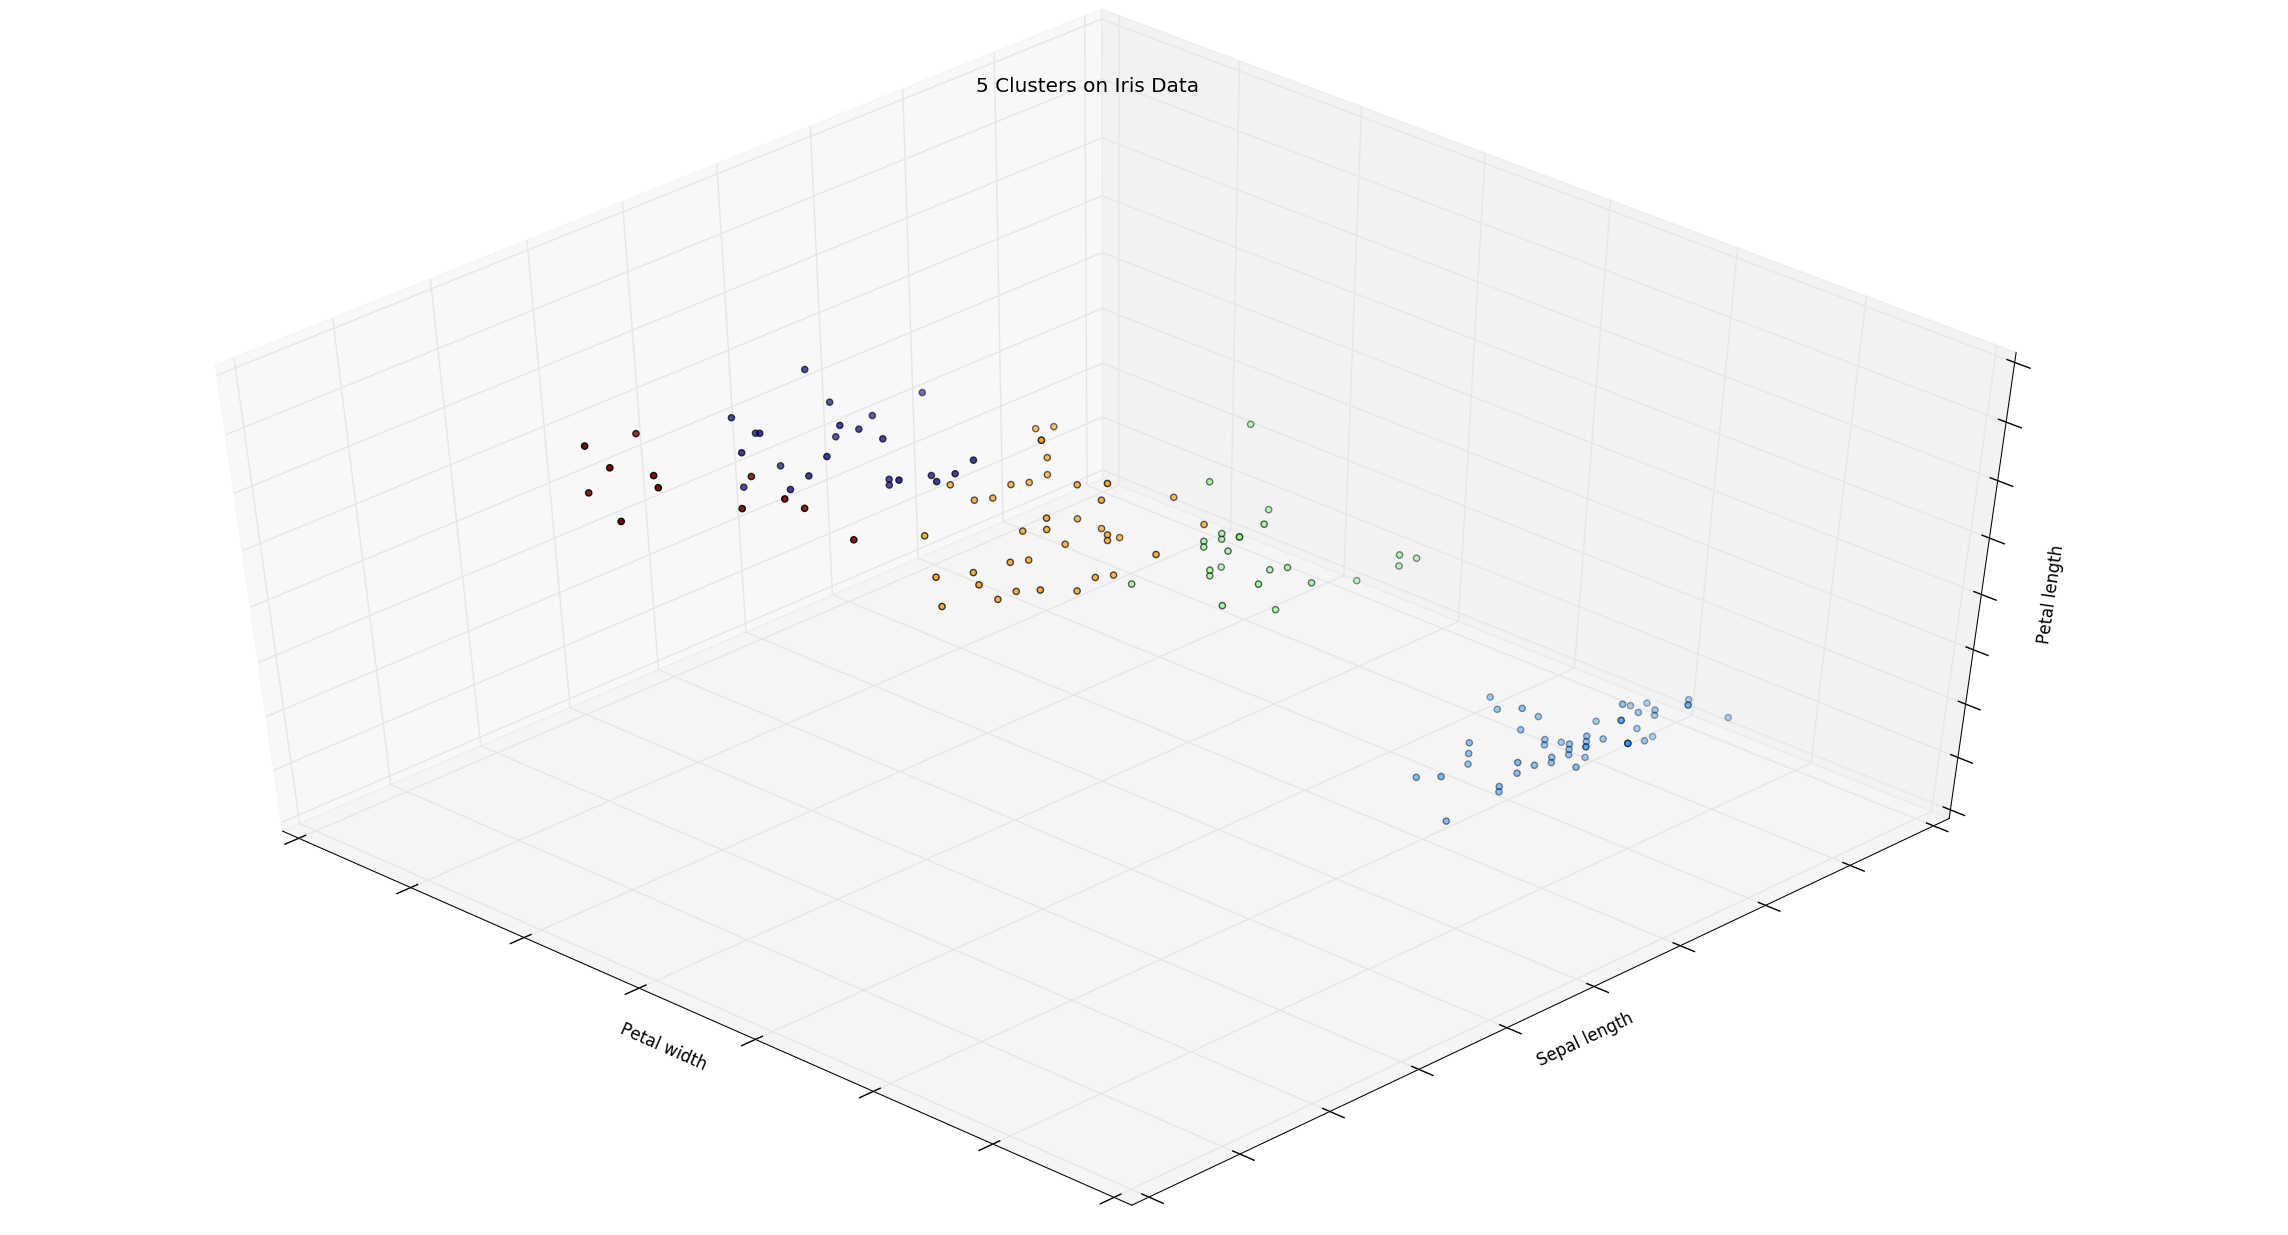

In [212]:
Image('data/Iris 5 Clusters.png')

- Points are spread across clusters
- What is the optimal number of cluster? 
    - Not easy to decide yet again
    - Use mathematical measure to derive optimal number of cluster - 
        - Within Sum of Square - closness of points within the cluster
        - Silhouette - how well points from different clusters are separated
        - Average Z-score of attributes - How cluster is different from average data
        - Size of each cluster 
    - Use business knowledge





Conclusion:
- Difficult to assess the number of clusters in the data
- Difficult to conclude which all features of the data should be used
- Difficult to assess the quality of cluster as we do not have any label against which we can compare => Unsupervised learning

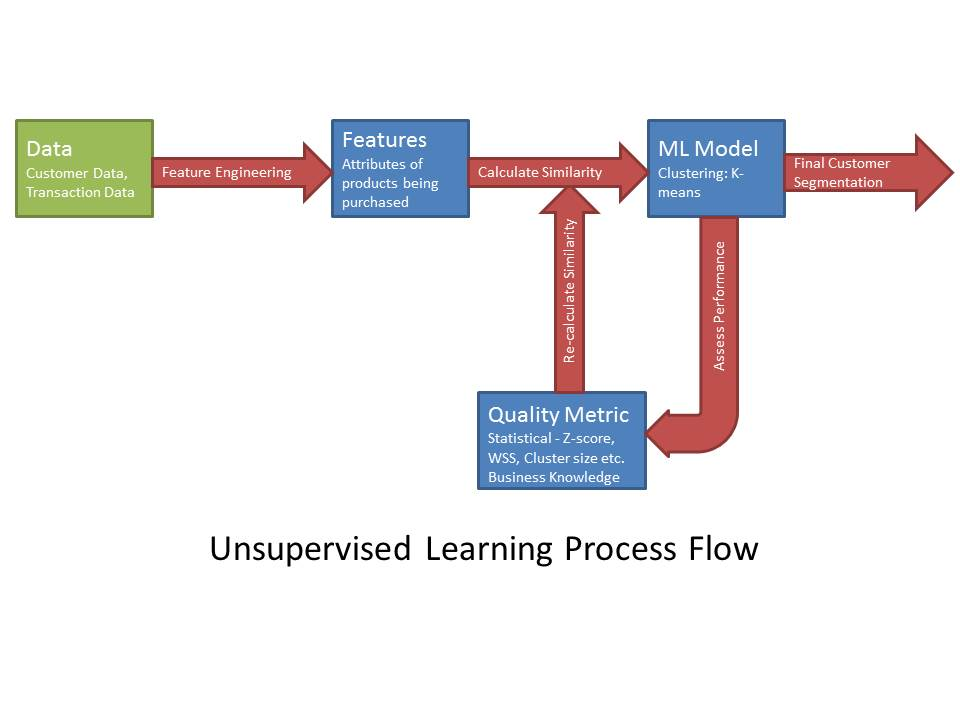

In [213]:
Image('data/UnsupervisedLearning.JPG')

=============================================================

## Next present brown shoe results in presentation - probably use the same presentation